In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [3]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_data.head()



,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
correlation=gold_data.corr()

<ipython-input-5-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

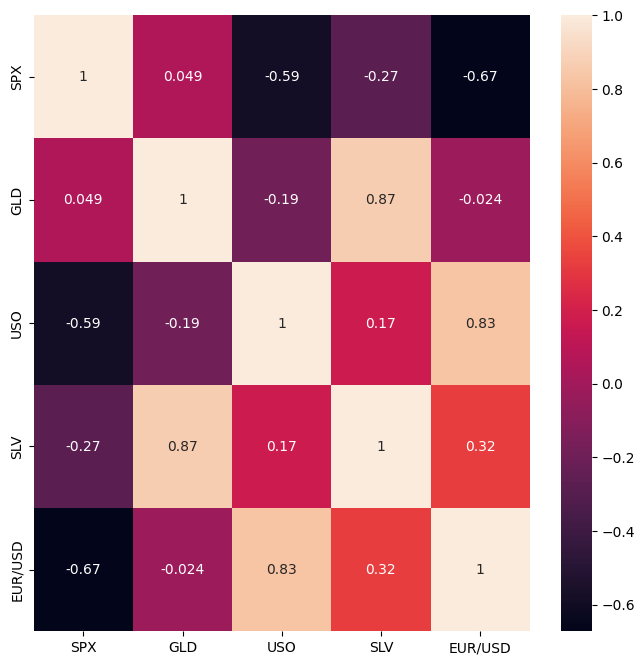

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True)

In [7]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-8-84e84c017de2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

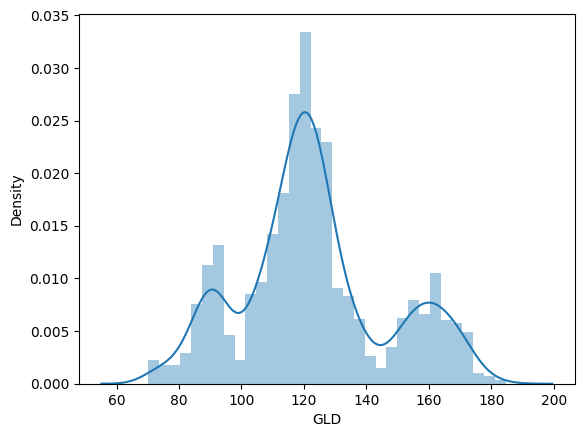

In [8]:
sns.distplot(gold_data['GLD'])

In [9]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
regressor=RandomForestRegressor(n_estimators=100)

In [12]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [13]:
test_data_prediction=regressor.predict(x_test)

In [14]:
print(test_data_prediction)

[168.45999909  81.88259978 116.14010043 127.61880077 120.61560137
 154.81789758 150.24459777 126.24030031 117.53229889 126.09540085
 116.96780103 172.1214006  141.50879858 168.04059833 115.04200011
 117.53230068 140.68730239 170.22360055 158.80870379 159.48159979
 155.00429999 125.48830012 176.41199962 157.13790285 125.18740033
  93.84089979  77.85739984 120.22770003 119.12909957 167.42080002
  88.29810056 125.17140037  91.1415009  117.69040057 121.21269919
 136.36930058 115.34220134 115.28670123 146.44569957 107.2797009
 104.90590251  86.97129772 126.53730049 117.63179984 152.95329898
 119.52120022 108.32939976 107.9647985   93.14760036 127.07469804
  75.38320045 113.67919894 121.14380051 111.16369949 118.79219872
 121.0778991  159.1106997  167.06590146 147.1396971   85.85479827
  94.38390061  86.85679846  90.57390028 119.05950077 126.40240058
 127.4159998  169.1709997  122.31359954 117.31379902  98.26510023
 168.49570106 143.24269857 131.64090223 121.1545026  121.62999945
 119.619400

In [17]:
error_score= metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.9892937603270346


In [18]:
y_test=list(y_test)

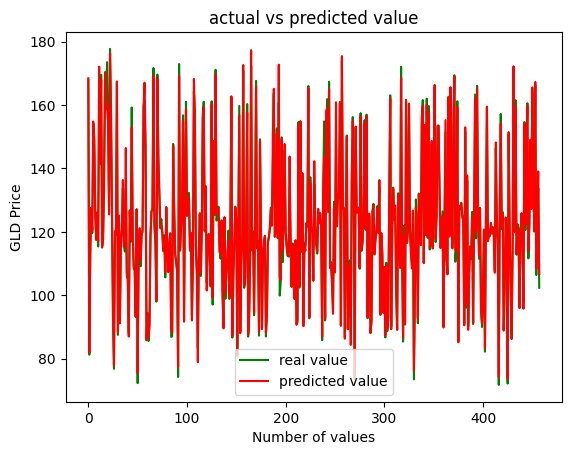

In [20]:
plt.plot(y_test,color='green',label='real value')
plt.plot(test_data_prediction,color='red',label='predicted value')
plt.title('actual vs predicted value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()